# Project Starts Here  

### Procedure In Shoe Recommendation
1) Load in the data from the "sneakers" folder.  
2) Run PCA on the dataset and project it onto the PC space to correct the "curse of dimensionality".  
3) Take the projected dataset with dimensionality reduction and place it inside the linkage function to run hierarchical clustering analysis.  
4) Ward looked the best, so we'll choose that type moving forward and scale down the output values.  
5) After scaling down, choose a good value to separate clusters (41.965 gave us 21 clusters and that's how many different shoe brands we had, but feel free to change it. Also be careful about the clusters that only have 1 data point inside them, it'll potentially break the system if you're not careful enough).  
6) Create a function that preprocesses the image to be ready to be compared.  
7) Compare the test image to the reduced image collection and find the image closest to the input image.  
8) Look at the cluster that the most similar image seen belonged to and recommend at most 3 images from that cluster to the user.  

Number 8 isn't implemented yet


In [1]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from scipy import stats
from numpy.linalg import norm
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

In [2]:
def all_linkages(data):

    tree_sing = linkage(data,method='single')
    tree_cplt = linkage(data,method='complete')
    tree_avrg = linkage(data,method='average')
    tree_ward = linkage(data,method='ward')

    fig, axs = plt.subplots(2,2, figsize=(12,12))

    dendrogram(tree_sing, ax=axs[0,0])
    axs[0,0].set_title('Single linkage')
    xlim = axs[0,0].get_xlim()
    axs[0,0].set_yticks([])
    axs[0,0].set_xticks([])
    axs[0,0].set_xlim(xlim)


    dendrogram(tree_cplt, ax=axs[0,1])
    axs[0,1].set_title('Complete linkage')
    axs[0,1].set_yticks([])
    axs[0,1].set_xticks([])

    dendrogram(tree_avrg, ax=axs[1,0])
    axs[1,0].set_title('Average linkage')
    axs[1,0].set_yticks([])
    axs[1,0].set_xticks([])

    dendrogram(tree_ward, ax=axs[1,1])
    axs[1,1].set_title('Ward linkage');
    axs[1,1].set_yticks([])
    axs[1,1].set_xticks([])

    sns.despine(left=True, bottom=True)
    
    return tree_sing, tree_cplt, tree_avrg, tree_ward

image_collection shape is: (1, 35625)
Inside folder 1: Converse
(102, 136, 3)
(136, 3)
(102, 3)
Original shape: (95, 125, 3)


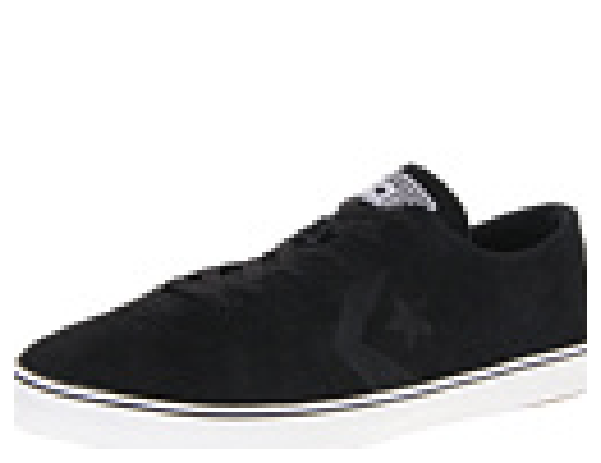

(1, 35625)
[[255. 255. 255. ... 255. 255. 255.]]


NameError: name 'image_collection' is not defined

In [3]:
from PIL import Image
import numpy as np
import os
from sklearn.metrics.pairwise import euclidean_distances

# Default parameters of the images
default_width = 136
default_length = 102
num_of_channels = 3
default_dimension = 35625

# Load in all of the images stored in the sneakers folder
# Define the collection of images
debug_collection = np.zeros((1, default_dimension))
print(f"image_collection shape is: {debug_collection.shape}")
# Pathway to the main folder that holds all types of shoes
main_path = "./sneakers"
# Makes a list of folder names found in the main folder
folders = os.listdir(main_path)
# Iterates through those folder names
for i, folder in enumerate(folders):
    # Keeps track of progress of folder dive
    print(f"Inside folder {i+1}: {folder}")
    # Creates the pathway to the folder inside the main folder 
    folder_path = os.path.join(main_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    # Iterate through all of the files and add them to the collection of flattened images
    for file in files:
        # Creates the pathway to the images inside the folder
        image_path = os.path.join(folder_path, file)
        # Loads the images into the notebook as a list and then changes it to a numpy array
        image_list = Image.open(image_path)
        image_np = np.array(image_list)
        print(image_np.shape)
        print(image_np[0].shape)
        print(image_np[:, 0].shape)
        rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
        cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
        # Remove rows
        image_np = np.delete(image_np, rows_to_delete, axis=0)
        # Remove columns
        image_np = np.delete(image_np, cols_to_delete, axis=1)
        print(f"Original shape: {image_np.shape}")
        plt.imshow(image_np)
        plt.axis('off')  # Turn off axis labels
        plt.show()
        image_flat = image_np.reshape(1, -1)
        # If this is the first image, index instead of stack inside the collection
        if i == 0:
            debug_collection[0] = image_flat
        else:
            debug_collection = np.vstack((debug_collection, image_flat))
        break
    break
print(debug_collection.shape)
print(debug_collection)
# for loop ends here
print(f"image_collection shape is: {image_collection.shape}")


In [4]:
# Load in all of the images stored in the sneakers folder
# Define the collection of images
image_collection = np.zeros((1, default_dimension))
print(f"image_collection shape is: {image_collection.shape}")
# Pathway to the main folder that holds all types of shoes
main_path = "./sneakers"
# Makes a list of folder names found in the main folder
folders = os.listdir(main_path)
# Iterates through those folder names
for i, folder in enumerate(folders):
    # Keeps track of progress of folder dive
    print(f"Inside folder {i+1}: {folder}")
    # Creates the pathway to the folder inside the main folder 
    folder_path = os.path.join(main_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    # Iterate through all of the files and add them to the collection of flattened images
    for file in files:
        # Creates the pathway to the images inside the folder
        image_path = os.path.join(folder_path, file)
        # Loads the images into the notebook as a list and then changes it to a numpy array
        image_list = Image.open(image_path)
        image_np = np.array(image_list)
        # Remove rows and columns
        rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
        cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
        image_np = np.delete(image_np, rows_to_delete, axis=0)
        image_np = np.delete(image_np, cols_to_delete, axis=1)
        # Flatten the image
        image_flat = image_np.reshape(1, -1)
        # If this is the first image, index instead of stack inside the collection
        if i == 0:
            image_collection[0] = image_flat
        else:
            image_collection = np.vstack((image_collection, image_flat))
# for loop ends here
print(f"image_collection shape is: {image_collection.shape}")


image_collection shape is: (1, 35625)
Inside folder 1: Converse
Inside folder 2: Reebok
Inside folder 3: AlexanderMcQueen
Inside folder 4: Amiana
Inside folder 5: SKECHERS
Inside folder 6: BetseyJohnson
Inside folder 7: ALDO
Inside folder 8: DSQUARED2
Inside folder 9: Crocs
Inside folder 10: Paul Smith
Inside folder 11: Nike
Inside folder 12: Lacoste
Inside folder 13: AdidasOriginals
Inside folder 14: UGG
Inside folder 15: ECCO
Inside folder 16: DVS Shoe Company
Inside folder 17: adidasY-3
Inside folder 18: KangaROOS
Inside folder 19: GUESS
Inside folder 20: Easy Spirit
Inside folder 21: Aetrex
image_collection shape is: (2057, 35625)


[255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 254. 254. 254. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 254. 254. 254. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 253. 254. 254. 252. 255. 255. 255.
 255. 255. 255. 254. 253. 255. 253. 253. 255. 255. 255. 255. 255. 254.
 255. 255. 254. 255. 254. 254. 254. 255. 255. 251. 247. 248. 243. 224.
 224. 226. 206. 204. 209. 195. 189. 193. 192. 186. 188. 176. 174. 175.
 171. 

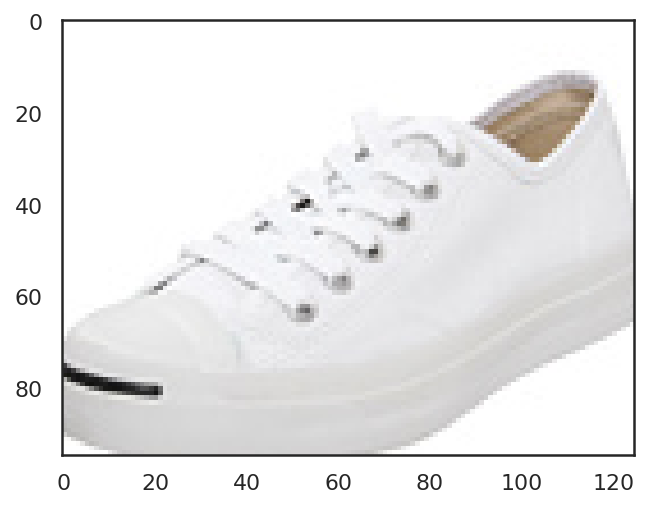

In [136]:
print(image_collection[0, 5000:5200])
plt.imshow(image_collection[0].astype(int).reshape((95, 125, 3)))

image_collection_mean shape: (1, 35625)


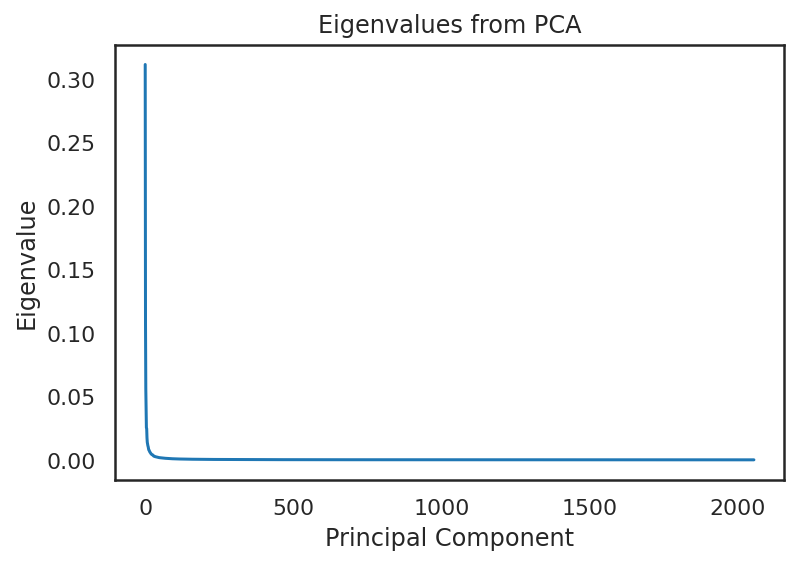

In [28]:
# Preprocess the data
# Because of the curse of dimensionality, we'll use PCA to reduce the dimensionality
image_collection_mean = np.mean(image_collection, axis=0, keepdims=True)
print(f"image_collection_mean shape: {image_collection_mean.shape}")

# Mean centered data
mean_centered_data = image_collection - image_collection_mean

# Choosing different values for the number of principal components to see which is better
pca = PCA()
pca.fit(mean_centered_data)
eigenvalues = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues from PCA')
plt.show()
#reduced_image_collection = pca.transform(mean_centered_data)
#print(f"reduced_image_collection shape: {reduced_image_collection.shape}")

How much variance is explained with 3: 47.39454362434686%


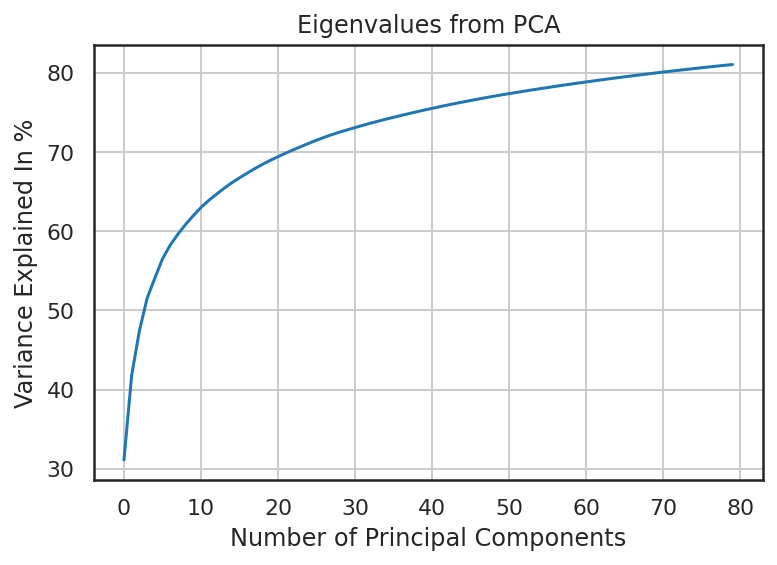

(80, 35625)


In [140]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[:100]*100.0))
print(f"How much variance is explained with {3}: {np.sum(pca.explained_variance_ratio_[:3])*100.0}%")
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained In %')
plt.title('Eigenvalues from PCA')
plt.grid("on")
plt.show()
print(pca.components_.shape)

In [57]:
n_components = 80
pca = PCA(n_components=80)
reduced_image_collection = pca.fit_transform(mean_centered_data)

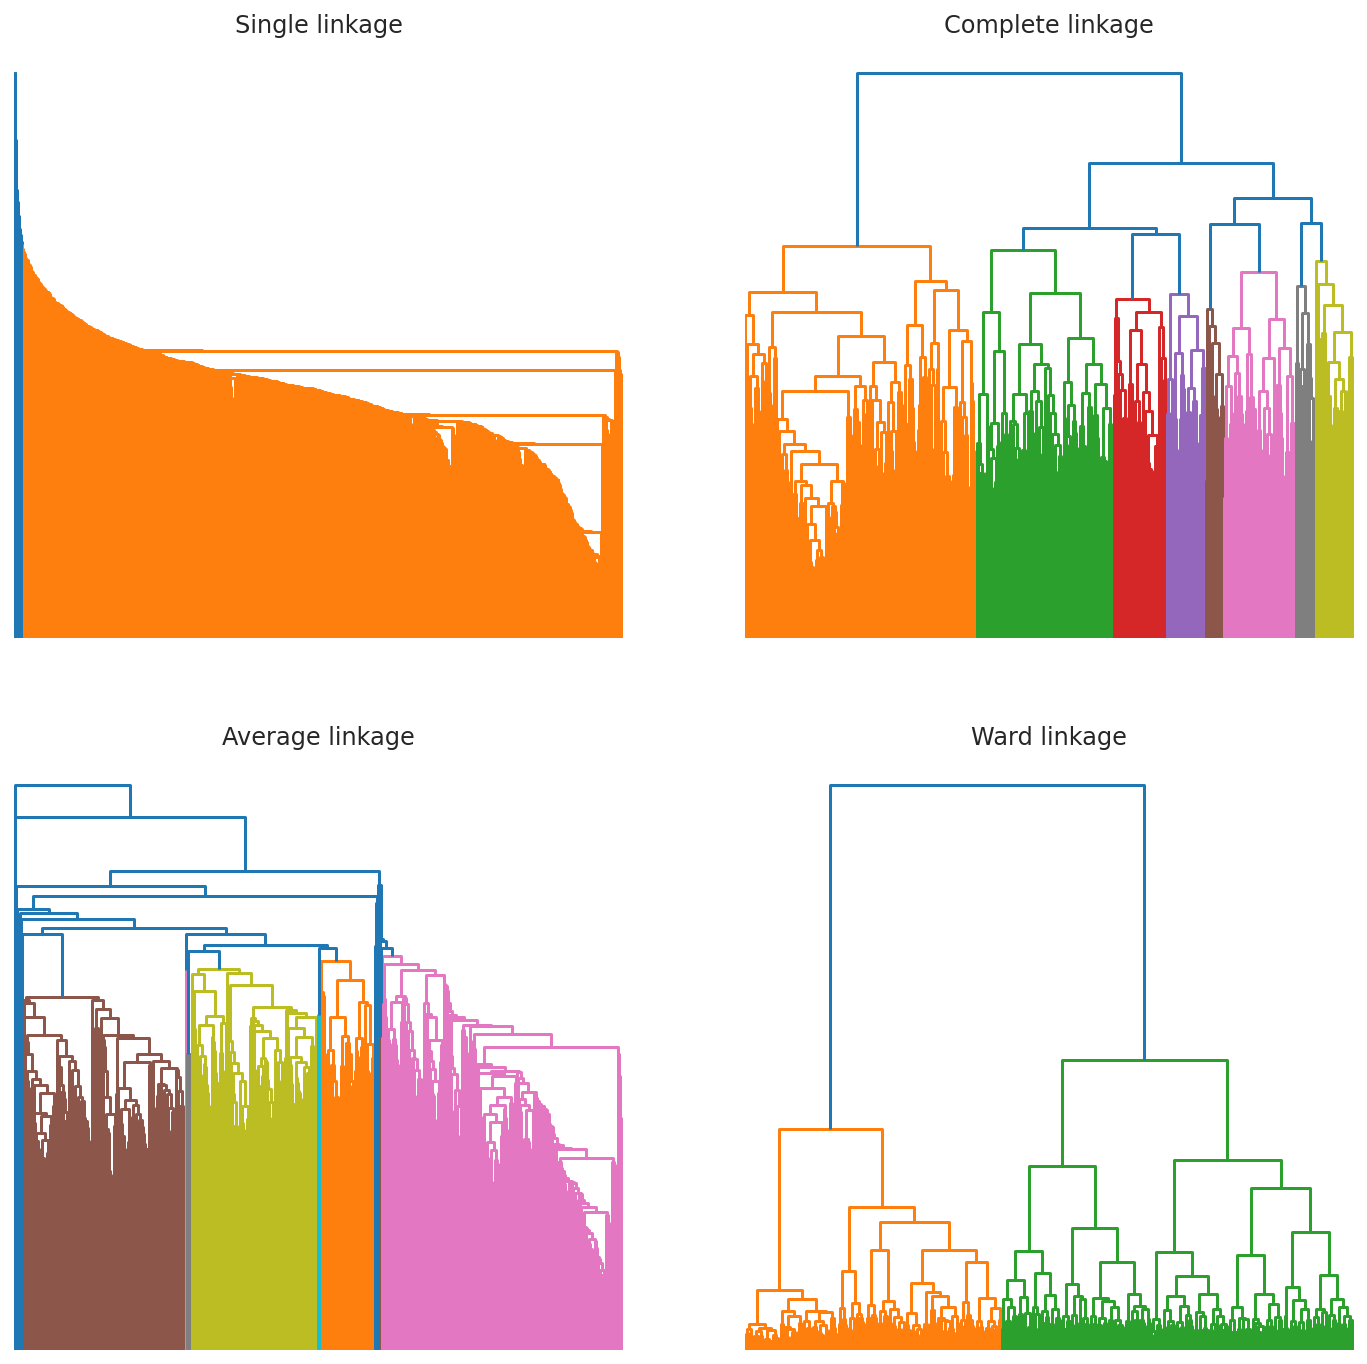

In [58]:
# Before Preprocessing
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(reduced_image_collection)

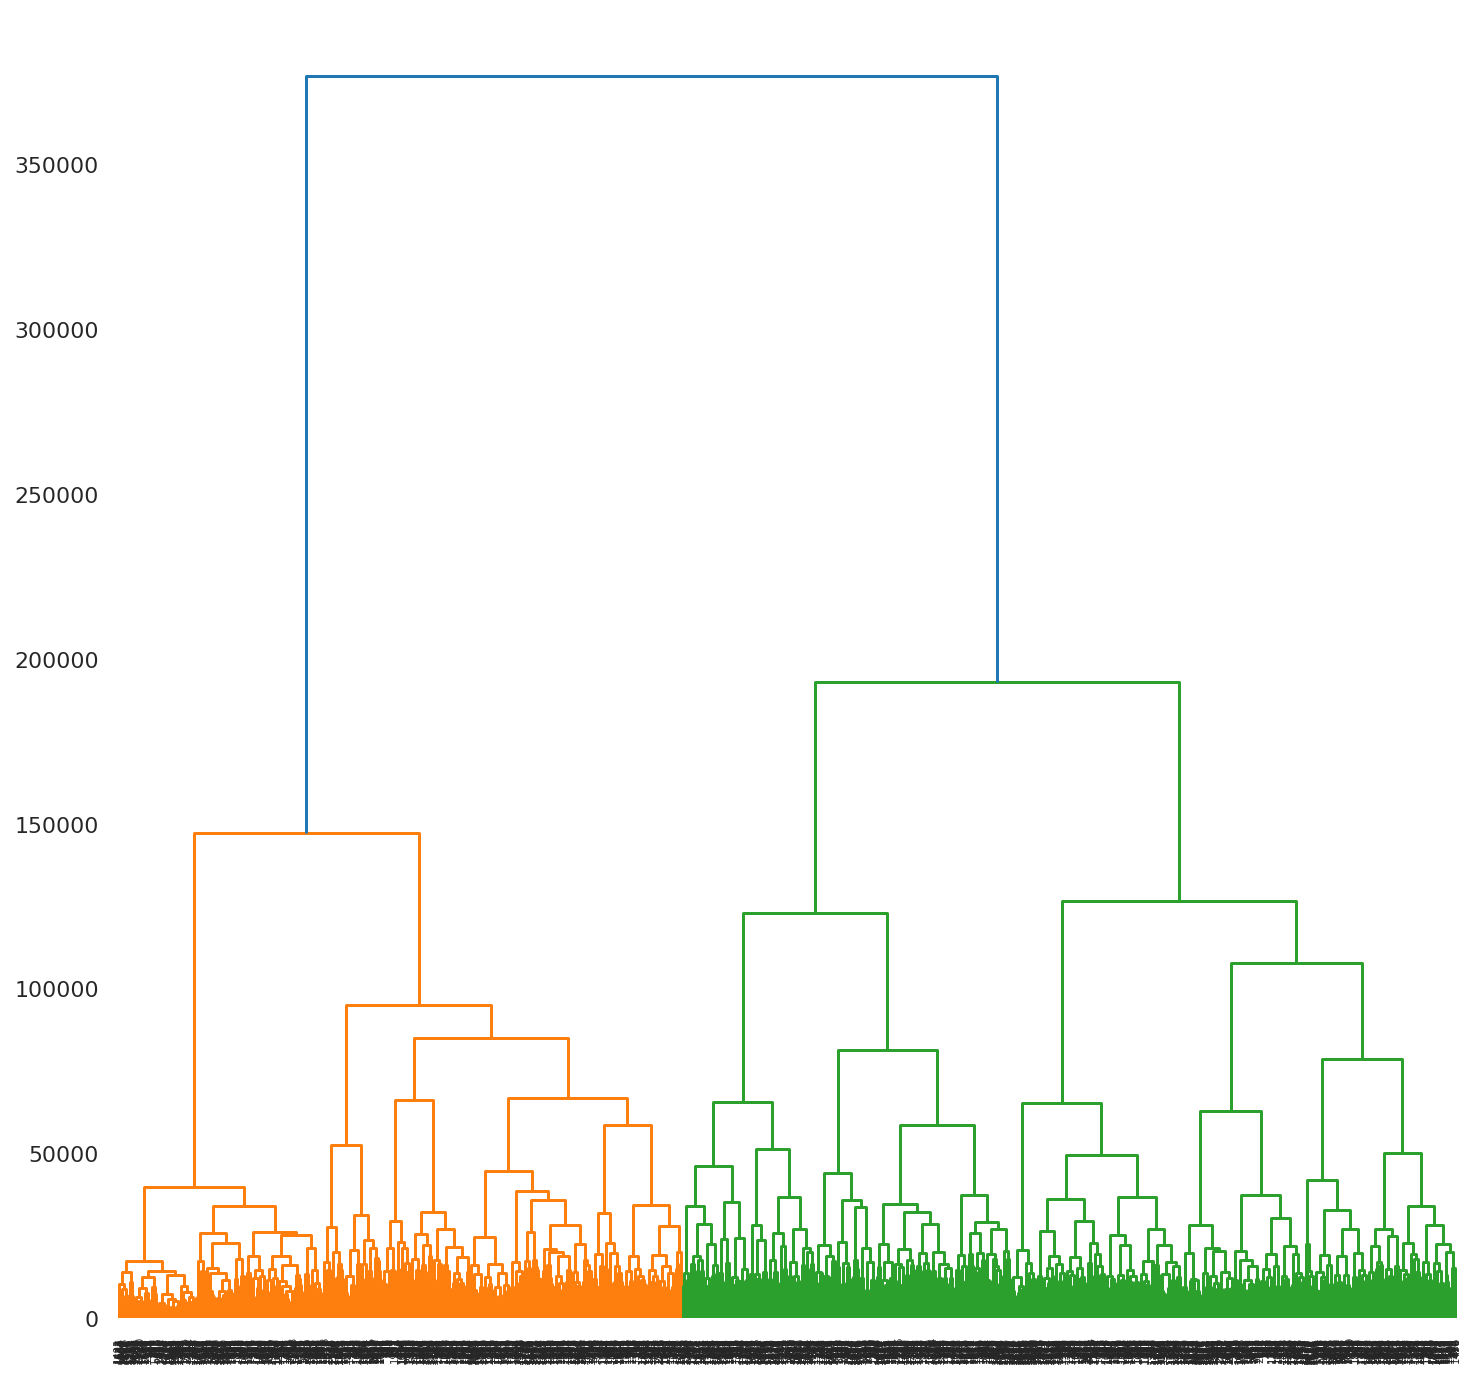

In [59]:
# Chose to use ward because it looked the most separable between clusters
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [60]:
# Lets look at the clusters
clust = fcluster(tree_ward, criterion='distance', t=75000) 
clust
# Because the separation distance between similarities are so far from each other 

array([1, 5, 1, ..., 7, 1, 6], dtype=int32)

In [61]:
scaled_data = StandardScaler().fit_transform(reduced_image_collection)

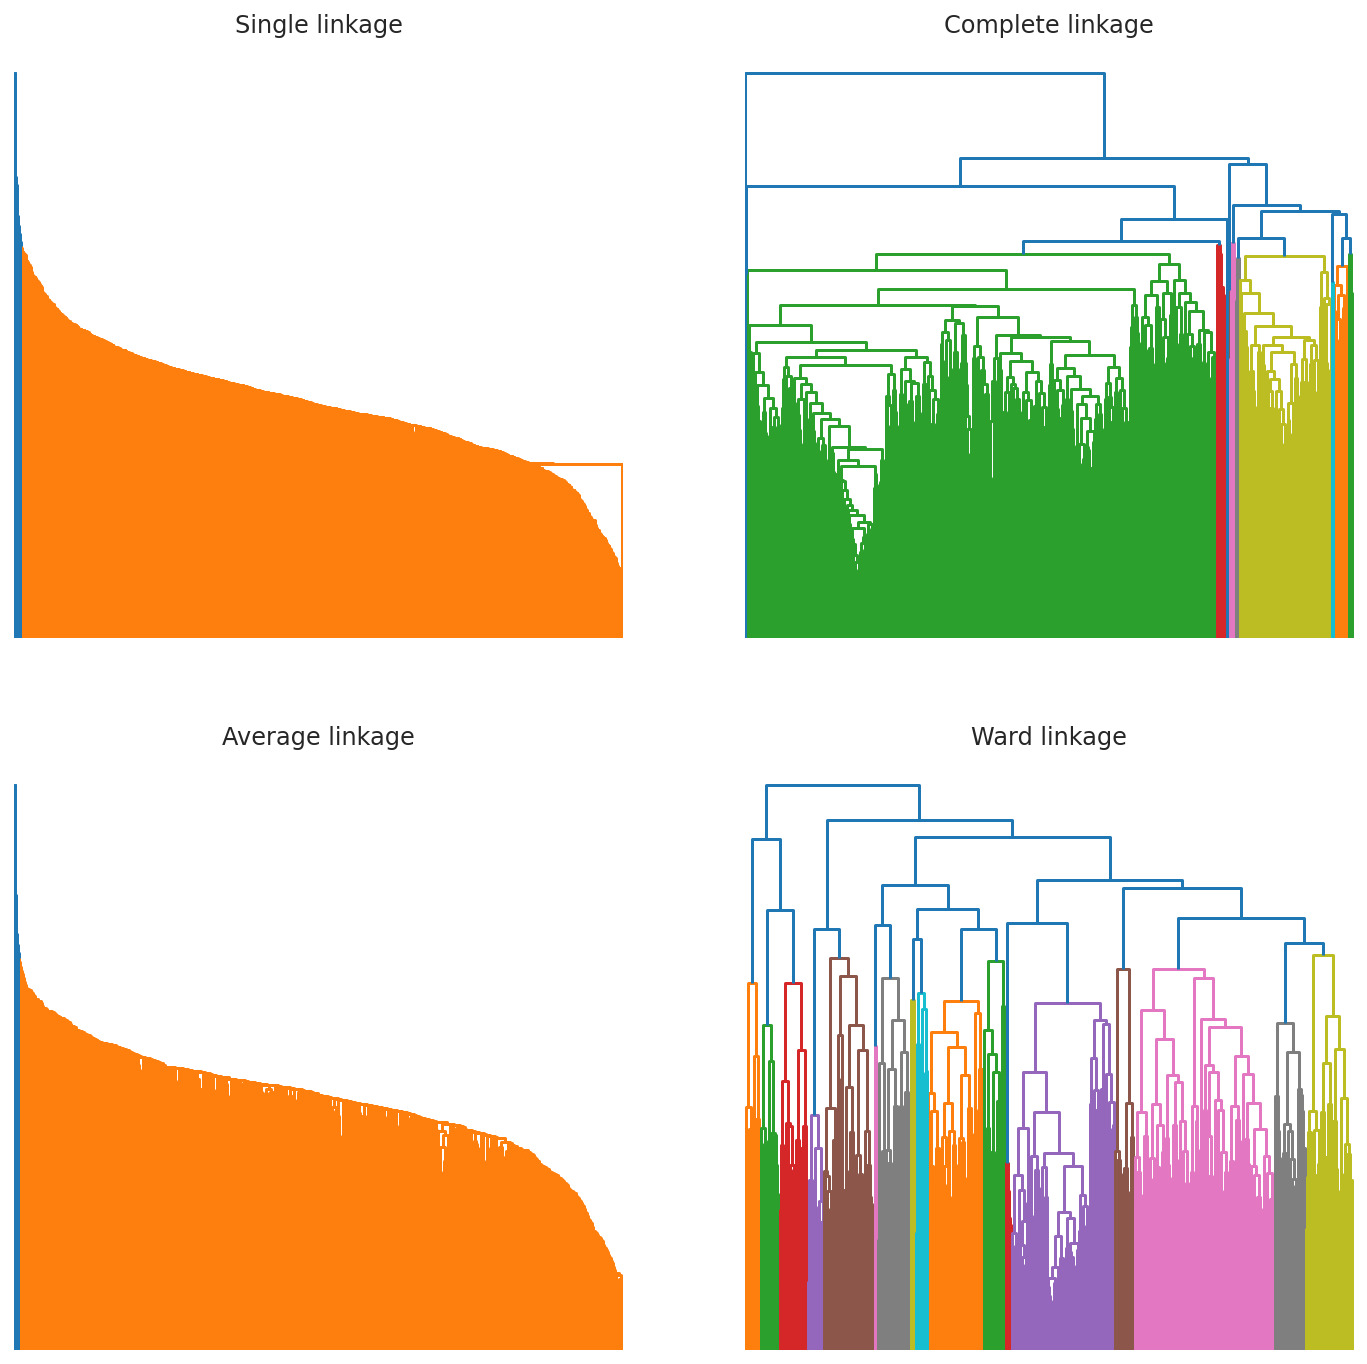

In [62]:
# After Preprocessing
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(scaled_data)

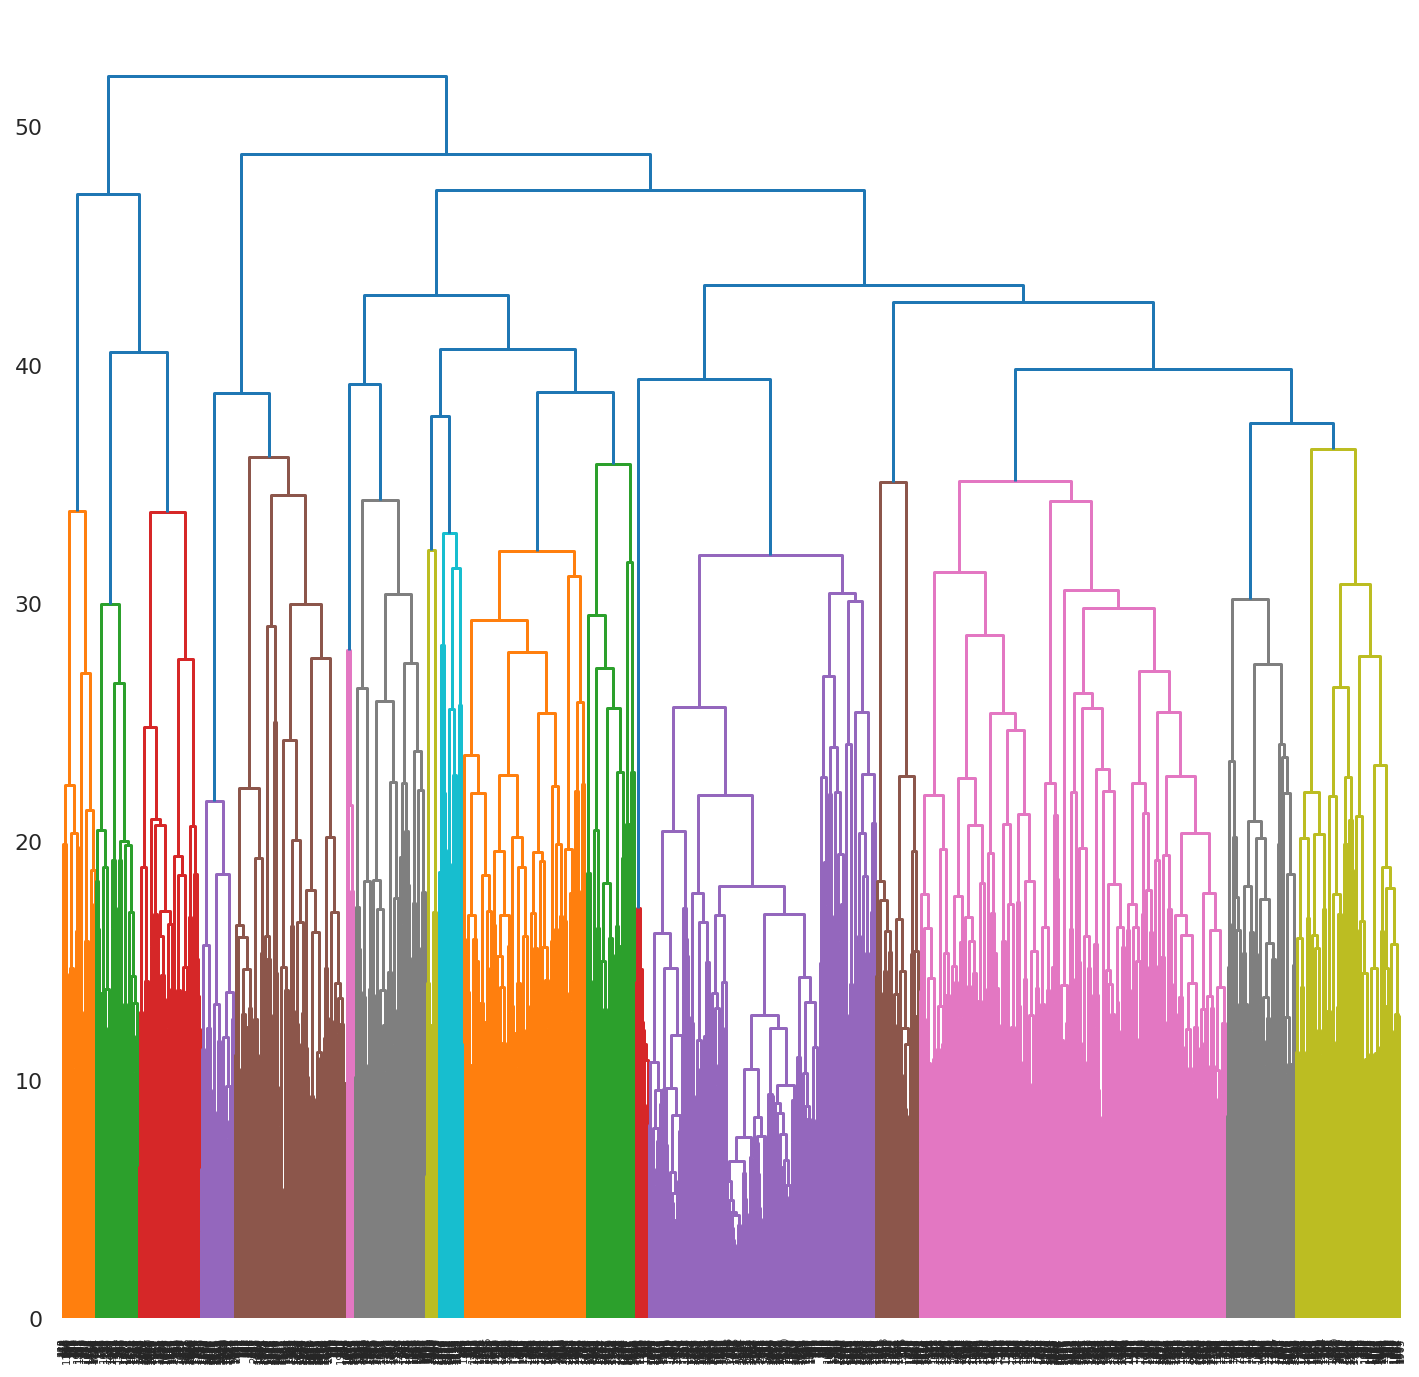

In [63]:
# Chose to use ward because it looked the most separable between clusters
# This is a tree ward using 80 PCs
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

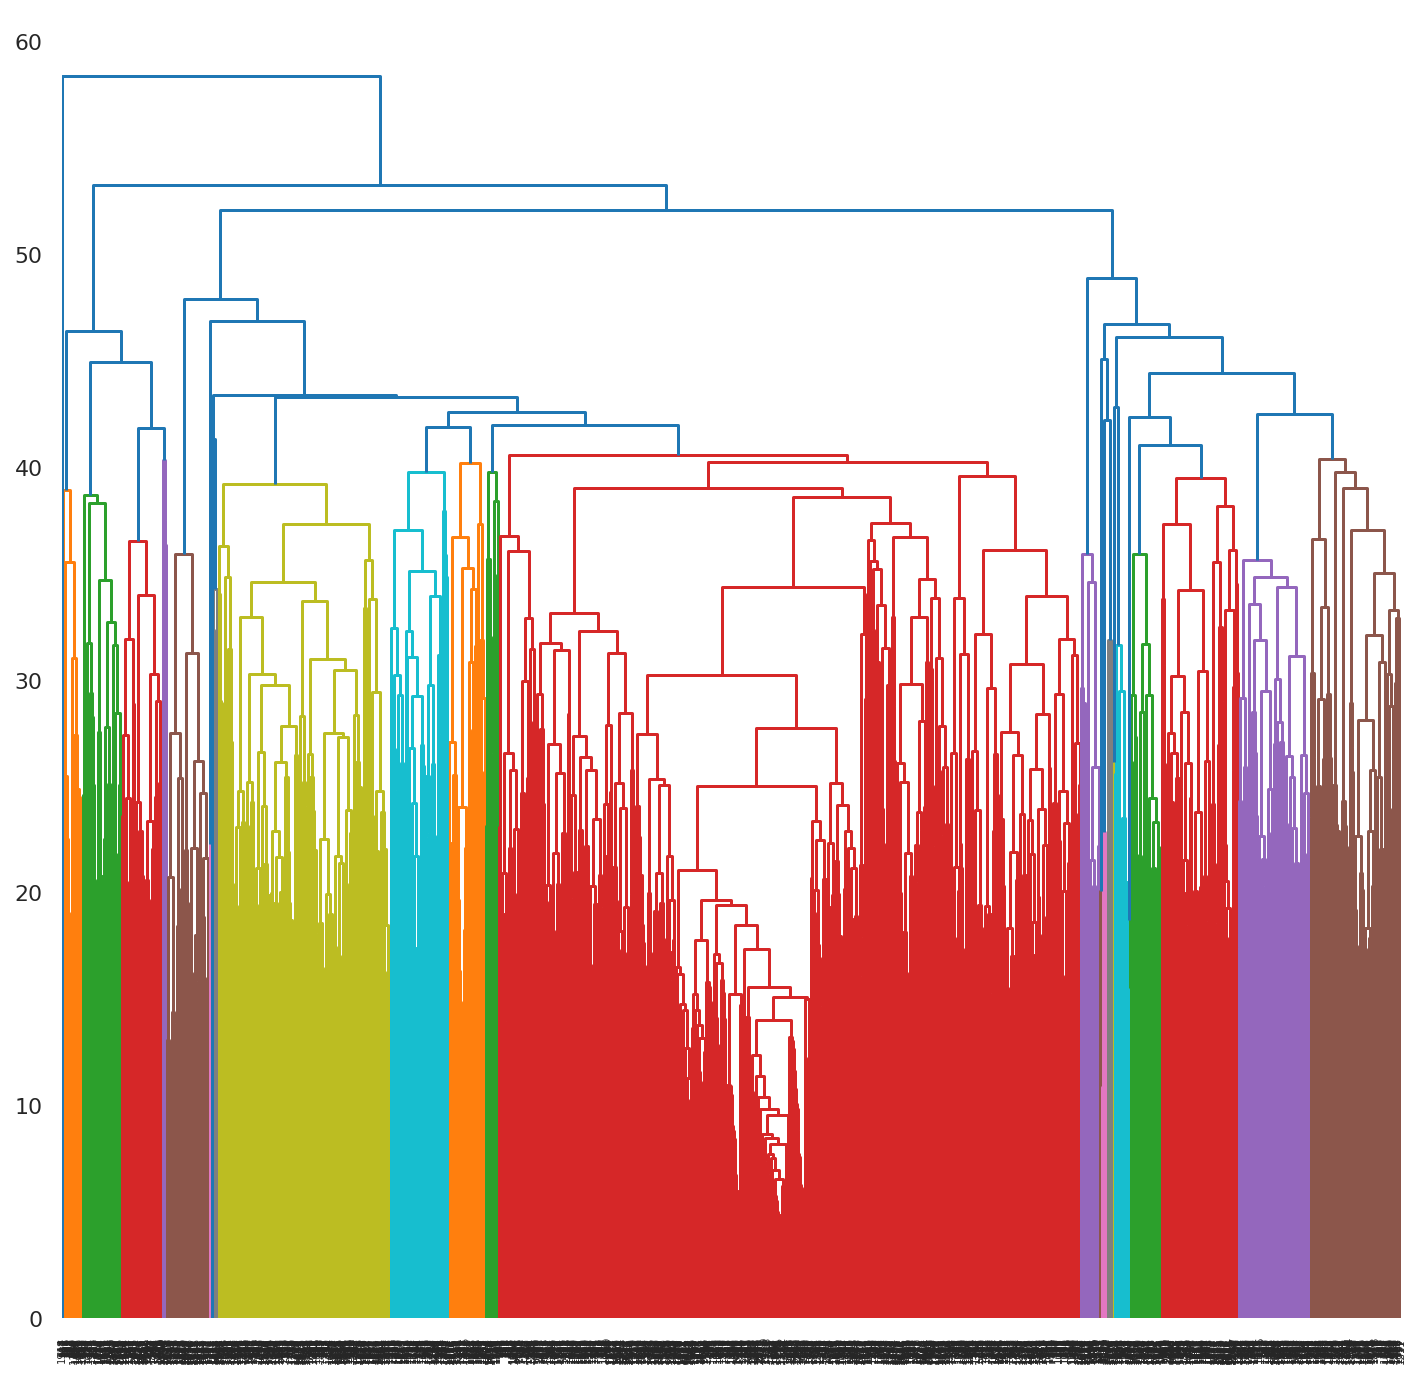

In [12]:
# Chose to use ward because it looked the most separable between clusters
# This is a tree ward using 200 PCs
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [66]:
# Lets look at the clusters
clust = fcluster(tree_ward, criterion='distance', t=35) 
clust
print(clust[:800])
# Because the separation distance between similarities are so far from each other 

[15 15 15 15 21 17 11 20 16 22 11  6 18 21 11  6 15 19 22 11  3 15  2 18
 20 15 19 17  2  2  6  2  2 19 18 11 14 11 19 21 18 10 11 19 22 11 19 18
 18 18 19 15  2 11 11 18  2 17 21 20 15 18 10  8 19 19  8 21 21 15  2 20
 11 11 15 11  3 10 12 20 21 18 20 18  3 20 18 19 18 18 19 21  8 19 18 11
 22 18 15 19 15 18 17 11 20  2 18 20 20  2  2 18  2 15 11  2 12  3 18 11
 19 12 16  2 15 20 15 16 18 12 15 20 12 11  8 20  3  5 21 21 10 19 15 15
  2 20 11 15  3  3 21  3 10  2  2 10 19  3 14  3  3 18  8 19 18  2 11 17
 21 20 12 15 11  2  8  8 18 17 15 15 11 15 16 15 17 22 18 16 14  8 18 22
 21 20 18 15 22  1  1  2 19 19 19 19  8 19 19 15 19 15 19 19 19 15  2  2
  2 19 19 19 21  6 15 18 22  5 22 22 22  6 18 14 19  8  5  5 19 18 22 19
 15  5 17 20  3 22  5 15 22 18 19 19  1 15 18 15 22 22 15 11 18 15  6  6
  5 15  6 15 22 11  3 17  5 15  1 20  8 17 19  1 19  3 22 15  5 18 20 22
 15 18 20  5 11  6 19 18 18 19 20 20 11 20 14 15  6 18  1 15 15 22 19 18
 11 22  5  5 19  5 22 15  1 18 18  1 20  1 15 15  1

In [67]:
max_number_of_clusters = 0
cluster_to_samples = {}
for elem in clust:
    if elem in cluster_to_samples:
        cluster_to_samples[elem] += 1
    else:
        cluster_to_samples[elem] = 1
    if elem > max_number_of_clusters:
        max_number_of_clusters = elem

print(f"The max number of clusters found were: {max_number_of_clusters}")
print(cluster_to_samples)
# Be careful about the clusters that only have 1 data sample to it 

The max number of clusters found were: 22
{15: 349, 21: 47, 17: 41, 11: 190, 20: 106, 16: 26, 22: 114, 6: 126, 18: 184, 19: 288, 3: 95, 2: 66, 14: 20, 10: 37, 8: 109, 12: 59, 5: 46, 1: 53, 4: 52, 9: 19, 13: 17, 7: 13}


In [24]:
def input_image_preprocesser(pathway, PCA_arg):
    # Loads the images into the notebook as a list and then changes it to a numpy array
    image_list = Image.open(pathway)
    image_np = np.array(image_list)
    # Remove rows and columns
    rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
    cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
    image_np = np.delete(image_np, rows_to_delete, axis=0)
    image_np = np.delete(image_np, cols_to_delete, axis=1)
    print(f"Image Shape: {image_np.shape}")
    # Image truncated shape: (95, 125, 3)
    # Flatten the image
    image_flat = image_np.reshape(1, -1) # (1, 200)
    image_flat = PCA_arg.transform(image_flat)
    return image_flat

In [112]:
def find_cluster_means(labels, num_of_clusters, data):
    cluster_means = np.zeros((num_of_clusters, 80))
    for i in range(1, num_of_clusters+1):
        # Finds the points associated with cluster i
        indices = labels == i
        cluster_means[i-1] = np.sum(data[indices, :], axis=0)/(data[indices, :]).shape[0]
    return cluster_means

In [150]:
pca_cluster_means = find_cluster_means(clust, max_number_of_clusters, reduced_image_collection)
print(pca_cluster_means.shape)
print(pca_cluster_means[3])

(22, 80)
[ 4.60851614e+02 -7.02251724e+03  5.58894302e+02  2.42057343e+03
 -1.76530197e+03 -3.42170823e+03  4.25930028e+02 -7.11069591e+01
  8.93966472e+02 -8.17455407e+02 -9.39334453e+02  1.57795479e+03
 -7.83652701e+02  4.33080699e+02  7.31393232e+02  4.19271864e+02
 -1.90619727e+02 -3.98952474e+02  8.88639594e+01  1.01286854e+01
 -1.91175606e+02  4.87143944e+02  2.00507910e+02  3.76669844e+02
 -1.61246010e+01 -8.96198107e+02 -5.76727931e+02 -2.50880930e+02
  3.72156036e+02  1.80702694e+02 -3.05534163e+02  1.98198687e+02
 -2.52945576e+02 -2.18378910e+02  5.34540559e+01  8.60052237e+01
 -6.92241512e+01  1.27383121e+02  2.12195990e+02 -3.08210171e+02
 -7.89289472e+01 -2.36703703e+02  5.53172027e+01  2.42886216e+02
  3.45350869e+02  3.45675478e+01  1.10871014e+02  2.72577498e+02
 -4.92632500e+02  7.65840461e+01  1.32184773e+02 -2.21398810e+02
 -1.17310647e+02  7.58594208e+01  4.40886207e+01  6.73298936e+01
 -9.22002949e+01 -1.11735284e+02  1.00043956e+02  3.96271776e+01
  6.34170513e+01

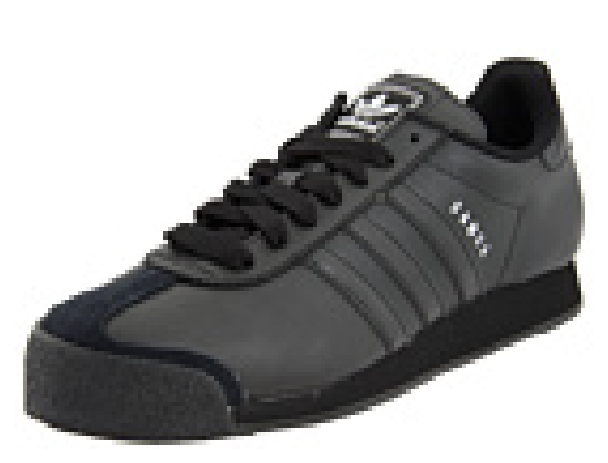

Image Shape: (95, 125, 3)
(1, 200)
Attempt 1: (1, 35625)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


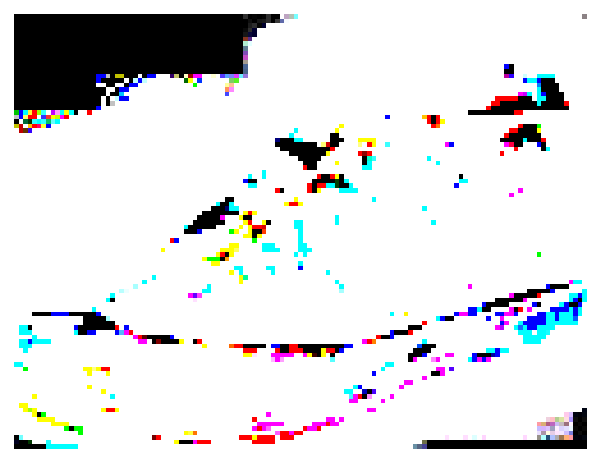

(2057, 200)
(2057, 35625)
(2057,)


In [25]:
# Here's an example of how to use the function
# Pass in the string pathway to the jpg and it'll pass out the correct image with downsize
debug_img = input_image_preprocesser("./sneakers/AdidasOriginals/7183714.11683.jpg", pca)
print(debug_img.shape)
print(f"Attempt 1: {pca.inverse_transform(debug_img).shape}")
image_reconstructed = pca.inverse_transform(debug_img).reshape((95, 125, 3))

plt.imshow(image_reconstructed)
plt.axis('off')  # Turn off axis labels
plt.show()
print(reduced_image_collection.shape)
print(image_collection.shape)
print(clust.shape)

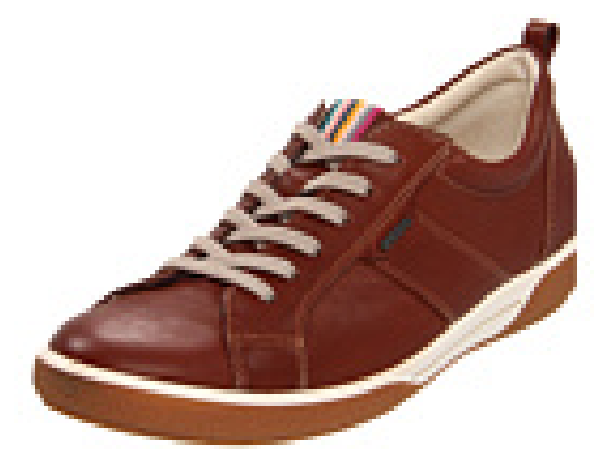

Image Shape: (95, 125, 3)
(1, 80)
(1, 22)
[[27505.37774444 29700.12158977 30546.03048583 26444.44081077
  26890.21514829 26078.10461885 34883.15417157 31427.98444087
  27184.39809249 28010.77685439 27897.7636425  31803.14902536
  31256.55301049 23834.67574823 22521.0216722  28559.75063805
  23280.27798808 25709.73524235 25663.55445964 27820.22759978
  27639.29157245 28994.61073643]]
[[22521.0216722  23280.27798808 23834.67574823 25663.55445964
  25709.73524235 26078.10461885 26444.44081077 26890.21514829
  27184.39809249 27505.37774444 27639.29157245 27820.22759978
  27897.7636425  28010.77685439 28559.75063805 28994.61073643
  29700.12158977 30546.03048583 31256.55301049 31427.98444087
  31803.14902536 34883.15417157]]
22521.021672200866
14
(2057, 35625)
(349, 35625)
(95, 125, 3)


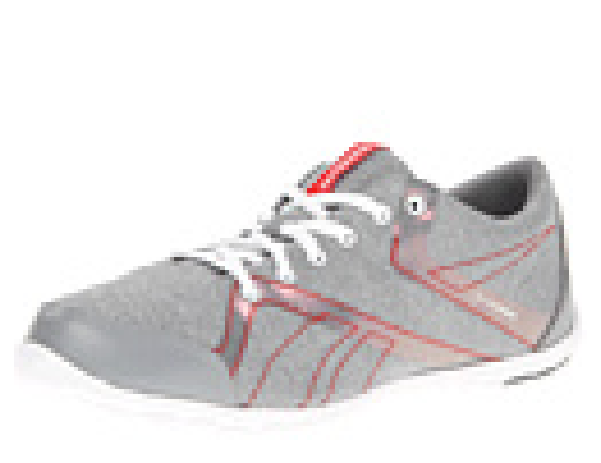

In [157]:
# Step 7
# This block is for computing comparisons
input_shoe_path = "./sneakers/ECCO/7703767.4769.jpg" # Change for shoe pathway
input_shoe = input_image_preprocesser(input_shoe_path, pca)
scaled_input = StandardScaler().fit_transform(input_shoe)
print(scaled_input.shape)
distances = euclidean_distances(input_shoe, pca_cluster_means)
print(distances.shape)
print(distances)
print(np.sort(distances))
print(np.min(distances))
print(np.argmin(distances))
print(image_collection.shape)
print(image_collection[clust==(np.argmin(distances)+1)].shape)
print((image_collection[clust==(np.argmin(distances)+1)])[0].reshape((95, 125, 3)).shape)
plt.imshow((image_collection[clust==(np.argmin(distances)+1)])[4].reshape((95, 125, 3)).astype(int))
plt.axis('off')  # Turn off axis
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15
[ True  True  True ... False  True False]
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
(2057, 35625)
(95, 125, 3)


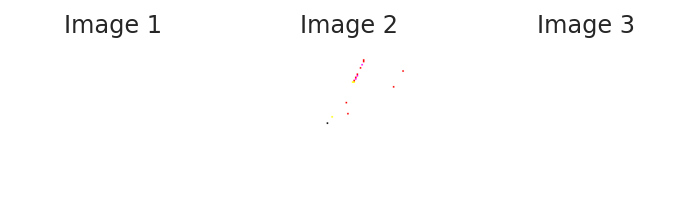

In [156]:
# Step 8
print(clust[lowest_idx])
print(clust == clust[lowest_idx])
clust_idx = clust == clust[lowest_idx]
print(image_collection[clust_idx])
print(image_collection.shape)
print((95, 125, 3))
max_images_to_rec = 3
for i, index in enumerate(clust_idx):
    if index:
        image_to_show = image_collection[i].reshape((95, 125, 3))
        plt.subplot(1, 3, 4-max_images_to_rec)  # 1 row, 3 columns, index 1
        plt.imshow(image_to_show)
        plt.title(f'Image {4-max_images_to_rec}')
        plt.axis('off')
        max_images_to_rec -= 1
        if not max_images_to_rec:
            break

            
            
